# PyGfx picking example

**Note that this example depends on pygfx (`pip install -U pygfx`).**

An example demonstrating pickable points.

RFBOutputContext()

Forcing backend: Vulkan (4)



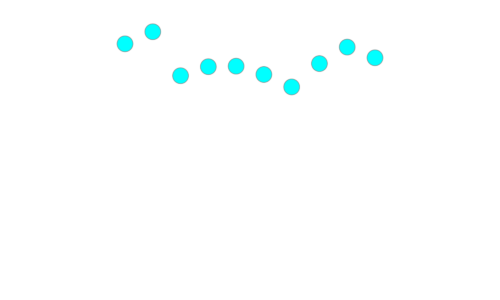

PickingWgpuCanvas()

In [1]:
import numpy as np
import pygfx as gfx
from wgpu.gui.jupyter import WgpuCanvas

class PickingWgpuCanvas(WgpuCanvas):
    def handle_event(self, event):
        super().handle_event(event)
        # Get a dict with info about the clicked location
        if event["event_type"] == "pointer_down":
            xy = event["x"], event["y"]
            info = renderer.get_pick_info(xy)
            wobject = info["world_object"]
            # If a point was clicked ..
            if wobject and "vertex_index" in info:
                i = int(round(info["vertex_index"]))
                geometry.positions.data[i, 1] *= -1
                geometry.positions.update_range(i)
                canvas.request_draw()

canvas = PickingWgpuCanvas()
renderer = gfx.renderers.WgpuRenderer(canvas)
scene = gfx.Scene()

xx = np.linspace(-50, 50, 10)
yy = np.random.uniform(20, 50, 10)
geometry = gfx.Geometry(positions=[(x, y, 0) for x, y in zip(xx, yy)])
if True:  # Set to False to try this for a line
    ob = gfx.Points(geometry, gfx.PointsMaterial(color=(0, 1, 1, 1), size=16))
else:
    ob = gfx.Line(geometry, gfx.LineMaterial(color=(0, 1, 1, 1), thickness=10))
scene.add(ob)

camera = gfx.OrthographicCamera(120, 120)

canvas.request_draw(lambda: renderer.render(scene, camera))
canvas